In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import gsw
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

To-do: figure out why deformation radius calc. is off (ref. weather in a tank site) and figure out what is going on at higher rotation rates...

# Dimensions

Parameters/dimensions of bucket (inches):
\begin{align*}
    r_{can} &= 3.5\\
    r_{inner}  &= 9\\
    %r_{outer} &= 12\\
    H &= 5
\end{align*}
Convert to cm:

In [2]:
cm_per_in  = 2.54
r_can_in   = 3.5
r_inner_in = 9
H_in       = 5.25
r_can, r_inner, H = [i*cm_per_in/100 for i in [r_can_in, r_inner_in, H_in]]
print('measurements in m:')
print(f'r_can   = {r_can:.3f}')
print(f'r_inner = {r_inner:.3f}')
print(f'H       = {H:.3f}')

radii = np.array([r_can, (r_can*3+r_inner)/4, (r_can+r_inner)/2, r_inner])

measurements in m:
r_can   = 0.089
r_inner = 0.229
H       = 0.133


#### Sensor locations

In [3]:
sensor_hgt_in = np.array([[1.0 , 4.25], # inches
                          [2.0 , 5.0],
                          [1.5 , 4.5],
                          [0.75, 3.5]])
sensor_hgt_in = sensor_hgt_in[:,::-1] # reverse order so that height of upper sensor is in left column
sensor_depth  = (H_in-sensor_hgt_in) * cm_per_in / 100 # m
print(sensor_depth)

[[0.0254  0.10795]
 [0.00635 0.08255]
 [0.01905 0.09525]
 [0.04445 0.1143 ]]


### Estimate $f_0$ from movies.

Observed minutes per revolution

In [4]:
## 100 experiment
t1_min = 6+(47/60)
t2_min = 8+(54/60)
T100 = t2_min-t1_min

## 300 experiment
t3_min = 17/60
t4_min = 58/60
T300 = t4_min-t3_min

## 500 experiment
T500 = (50-25)/60

### convert to radians/sec

In [5]:
def convert_to_rad_per_sec(T):
    '''convert period from minutes per revolution to radians/sec'''
    sec_per_rev = T*60
    rad_per_sec = 2*np.pi / sec_per_rev
    return rad_per_sec
print('stated rate    rad/s')
for i in [1,3,5,10,20,30]:
    print(f'{int(1e2*i)}            {convert_to_rad_per_sec(T100/i):.2f}')

stated rate    rad/s
100            0.05
300            0.15
500            0.25
1000            0.49
2000            0.99
3000            1.48


# Wavenumber of max growth

Wavenumber which maximizes growth rate:
\begin{align*}
    \kappa = 2\frac{f_0}{N_0H}
\end{align*}

In [13]:
(r_inner + r_can)/2

0.15875

In [16]:
sensor_depth[:,1] - sensor_depth[:,0]

array([0.08255, 0.0762 , 0.0762 , 0.06985])

Parameters:
\begin{align*}
     f_0 &= 2\Omega = 2\frac{R}{2000}=\frac{R}{1000}~\text{rad/s}\\
     N_0^2 &= \frac{2g}{\Delta z}\left[\frac{\alpha\Delta T}{2+\alpha\Delta T}\right]~\text{s}^{-2}\\
     H   &= 0.133~\text{m}\\
     L_d &= \frac{N_0H}{f_0}
\end{align*}

Compute $\kappa$:
\begin{align*}
    \kappa &= \frac{2}{L_d}~\text{rad/m}
\end{align*}
Max instability occurs for gravest meridional wavenumber. Distance across channel is $\approx.14$ m, corresponding to a wavenumber of $\frac{1}{0.14}$ cycles/m and $l\approx 44.9$ radians/m. $\kappa^2=k^2+l^2$, so zonal wavenumber is $k=\sqrt{\kappa^2-l^2}=\sqrt{\left(\frac{2}{L_d}\right)^2-44.9^2}$ radians/meter. Next, convert from radians/meter to cycles/circumference (planetary wavenumber). The circumference of channel (at midpoint between can and outer edge) is $\approx 1.0$ m.

\begin{align*}
    k_{planetary} &= k~\text{rad/m} \times \frac{1}{2\pi}~\text{cycles/rad} \times 2\pi r\
    \text{m}\\
    &= kr~\text{cycles/circumference}
\end{align*}

## Derivation of $N^2$

Denote $\rho_1$ and $\rho_2$ denote densities at upper and lower sensors, respectively.

$N^2$:
\begin{align*}
    N^2 &= -\frac{g}{\tilde{\rho}}\left(\frac{\partial \tilde{\rho}}{\partial z}\right)\\
        &\approx -\frac{2g}{\rho_1+\rho_2}\left(\frac{\rho_1-\rho_2}{\Delta z}\right)\\
        &= \frac{2g}{\rho_1+\rho_2}\left(\frac{\rho_2-\rho_1}{\Delta z}\right)
\end{align*}

Approximate density as:
\begin{align*}
    \rho &\approx \rho_0\left[1-\alpha\left(T-T_0\right)\right]\\
\end{align*}
Use upper-level density as reference (i.e. set $\rho_0=\rho_1$):
\begin{align*}
    \rho_2 &\approx \rho_1\left[1-\alpha\left(T_2-T_1\right)\right]
\end{align*}
Density difference between bottom and top sensors:
\begin{align*}
    \implies \rho_2-\rho_1 &\approx \rho_1\left[1-\alpha\left(T_2-T_1\right)\right] - \rho_1\\
    &= \rho_1\left[\alpha\left(T_1-T_2\right)\right]\\
    &= \rho_1\alpha\Delta T
\end{align*}
Compute sum of densities (used to compute mean density):
\begin{align*}
    \rho_2+\rho_1 &= \frac{1}{2}\left[\rho_1\left[1-\alpha\left(T_2-T_1\right)\right] + \rho_1\right]\\
    &= \rho_1\left[2-\alpha\left(T_2-T_1\right)\right]\\
    &= \rho_1\left[2+\alpha\Delta T\right]
\end{align*}

Substitute:
\begin{align*}
    N^2 &= \frac{2g}{\rho_1\left[2+\alpha\Delta T\right]}\left(\frac{\rho_1\alpha\Delta T}{\Delta z}\right)\\
    &= \frac{2g}{\Delta z}\left[\frac{\alpha\Delta T}{2+\alpha\Delta T}\right]\\
    &\approx \alpha g\frac{\Delta T}{\Delta z}
\end{align*}

### Load real temperature data

In [6]:
T_data = pd.ExcelFile('data.xlsx')
T_data = pd.read_excel(T_data, sheet_name=None)
old_keys = list(T_data)
R_vals   = [2000,500,300,100]
T_data   = {k_new : T_data[k_old] for k_new, k_old in zip(R_vals, old_keys)}
time_s   = T_data[100].iloc[:,0].values
time_min = time_s/60

In [17]:
def get_N0(T,p):
    '''Compute buoyancy frequency given Temperature at two depths, using custom function. 
    First col of {T,p} is {T,p} at upper sensor'''
    a  = 2e-4 # K^{-1}
    g  = 9.8  #m/s^2
    dT = T[:,0]-T[:,1] # upper temperature minus lower temperature
    dz = np.tile(p[:,1]-p[:,0], (dT.shape[0])) # lower pressure minus upper pressure
    N2 = a*g*dT/dz # simplified expression
#     N2 = 2*g / dz * (a*dT)/(2+a*dT)
    return np.sqrt(N2)[:,None]

def get_f0(R):
    '''Compute f0 based on "R" value
    factor of 2pi?'''
    Omega = R/2000
    return 2*Omega

def get_Ld(T,p,R,H):
    '''Compute deformation radius'''
    N  = get_N0(T,p)
    f0 = get_f0(R)
    return N*H/f0

def get_kappa(Ld, radius, use_l, channel_width=radii[-1]-radii[0]):
    '''Compute max wavenumber based on deformation radius (Ld) and distance from center (radius).
    Distance from center matters because this value is the number of waves which "fit" in the domain'''
    circ        = 2 * np.pi * radius    # circumference of can; units of m
    kappa_rad_m = 2/Ld                    # units of radians/m
    if use_l:
        l = 2*np.pi / channel_width # meridional wavenumber, in radians/meter
        l = l/2
    else:
        l = 0
    k_rad_m     = np.sqrt(kappa_rad_m**2 - l**2)
    k_planetary = k_rad_m * radius
    return k_planetary

def compute_kappa(r, use_l=False):
    ## Compute number of waves which fit in domain
    X     = T_data[r]
    kappas= []
    Lds   = [] # deformation radii
    for j in range(4):
        i  = 2*(j+1)                    # index for upper sensor column
        T     = X.iloc[:,i:i+2].values  # temp. at upper/lower sensor
        p     = sensor_depth[j:j+1]     # get pressure at sensor locations
        Ld    = get_Ld(T,p,r,H)
        kappa = get_kappa(Ld, radii[j], use_l=use_l)
        kappas.append(kappa)
        Lds.append(Ld)
    return np.concatenate(kappas, axis=1), np.concatenate(Lds, axis=1)

## Compute wavenumber and $L_d$

In [27]:
r_can/2.54

0.035

In [26]:
r_inner

0.2286

/home/theo/miniconda3/envs/torch_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.
/home/theo/miniconda3/envs/torch_env/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/home/theo/miniconda3/envs/torch_env/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in sqrt


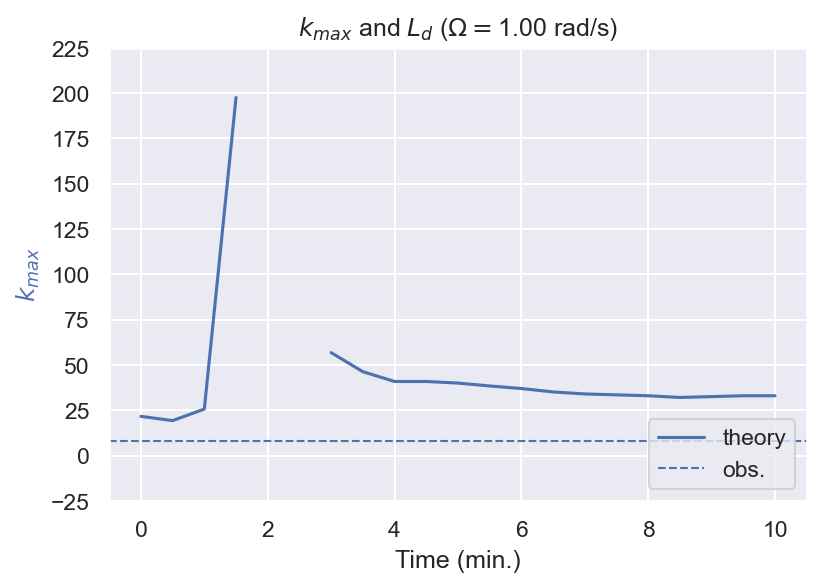

/home/theo/miniconda3/envs/torch_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.
/home/theo/miniconda3/envs/torch_env/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/home/theo/miniconda3/envs/torch_env/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in sqrt


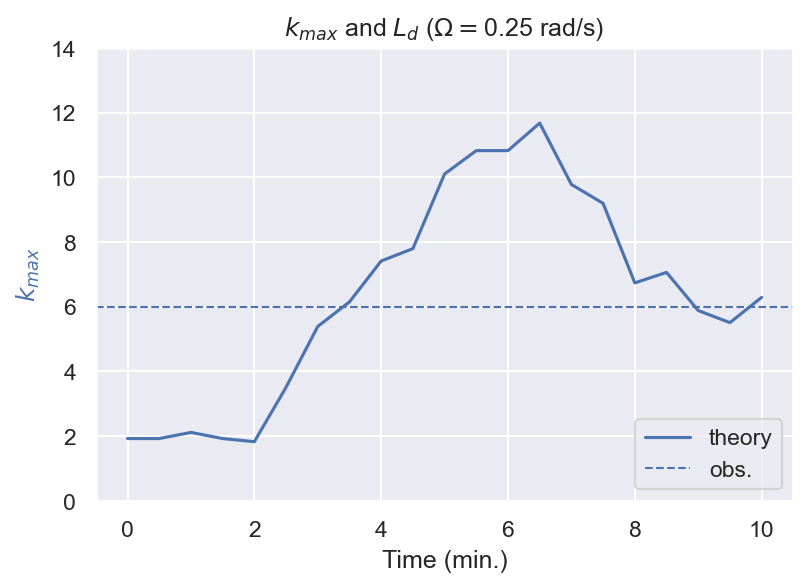

/home/theo/miniconda3/envs/torch_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.
/home/theo/miniconda3/envs/torch_env/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/home/theo/miniconda3/envs/torch_env/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in sqrt


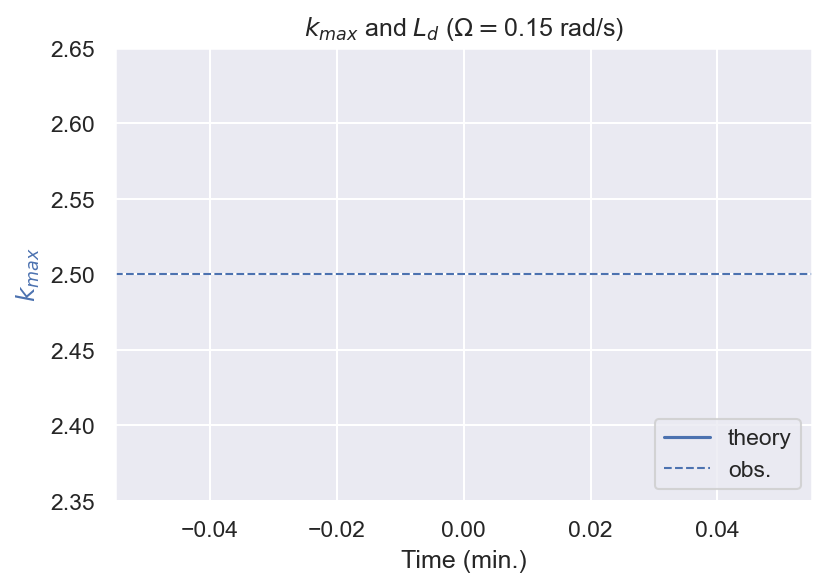

/home/theo/miniconda3/envs/torch_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.
/home/theo/miniconda3/envs/torch_env/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/home/theo/miniconda3/envs/torch_env/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in sqrt


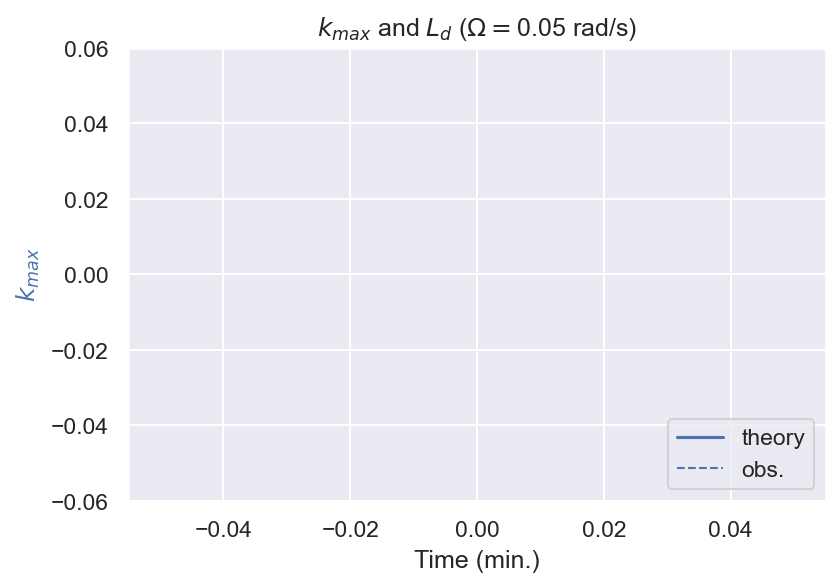

In [20]:
use_l = True # whether to factor in meridional wavenumber
si    = -1    # index of sensor
Ld_est= 13
alpha=.05 # plotting hyper-params 
lw   = 1
k_obss = [8, 6, 2.5, np.nan]
Ld_obss= [5, 13,17,np.nan]

for ri in range(4):

    k_est  = k_obss[ri]
    Ld_est = Ld_obss[ri]

    results = np.stack([np.stack(compute_kappa(r, use_l=use_l),axis=2) for r in R_vals], axis=2)
    kappas, Lds = results[...,0], results[...,1]                  
    colors = sns.color_palette()
    fig,ax = plt.subplots()
    f0 = get_f0(R_vals[ri])
    ax.set_title(r'$k_{max}$ and $L_d$ ($\Omega=$'+f'{f0/2:.2f} rad/s)')

    ### plot k
    ax.plot(time_min, kappas[:,si,ri], c=colors[0], label='theory')
    ax.axhline(k_est, c=colors[0],ls='--', label='obs.', lw=lw)
    ax.set_ylabel(r'$k_{max}$', c=colors[0])
    ax.set_xlabel('Time (min.)')
    # ax.set_ylim([0,30])

    ### plot Ld
#     ax2 = ax.twinx()
#     ax2.grid(False)
#     ax2.plot(time_min, 3.9*100*Lds[:,si,ri], label='L_d', c=colors[1])
#     ax2.axhline(Ld_est, c=colors[1],ls='--', lw=lw)
#     ax2.set_ylabel(r'$L_d$ (cm)', c=colors[1])
    # ax2.set_ylim([0,6])

    ax.set_yticks(np.linspace(ax.get_yticks()[0], ax.get_yticks()[-1], len(ax.get_yticks())))
    # ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax.get_yticks())))

    ax.legend(loc='lower right')
    plt.show()

### Compare computed buoyancy frequency to GSW

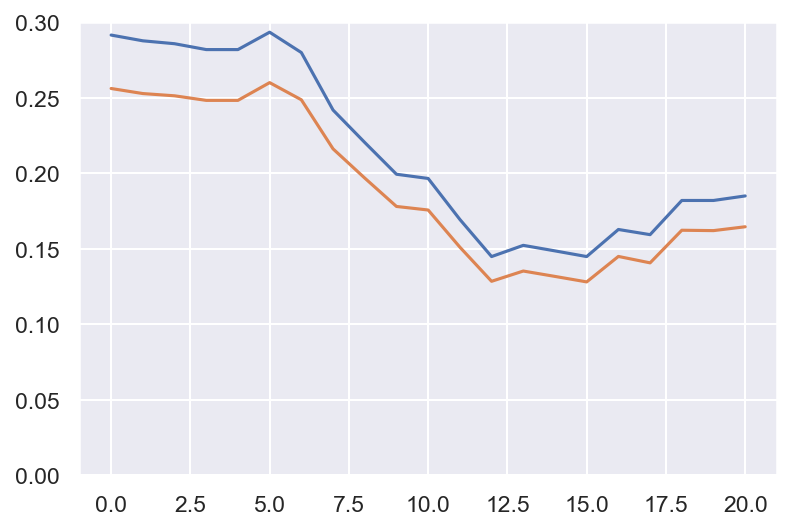

In [47]:
def get_N0_gsw(T,p):
    '''Compute buoyancy frequency given Temperature and pressure using GSW toolbox.
    Each column corresponds to different sensor'''
    SA  = np.zeros_like(T)              # salinity = 0
    p   = np.tile(p, (T.shape[0],1))      # reshape to match temperature
    CT  = gsw.CT_from_t(SA,  T, p) # conservative temperature
    N2,_= gsw.Nsquared( SA, CT, p, axis=1)   # buoyancy frequency squared
    return np.sqrt(N2)

ri = 1
si = 2
R  = R_vals[ri]
T = T_data[R].iloc[:,[(1+si)*2,(1+si)*2+1]].values
p = sensor_depth[si:si+1]

N0_v1 = get_N0(T,p)
N0_v2 = get_N02(T,p)
N0_gsw= get_N0_gsw(T,p)

plt.plot(N0_v1)
plt.plot(N0_gsw)
plt.ylim([0,.3])
plt.show()

In [63]:
print(T[8])
print(N0_v1[8])
print(p[:,1]-p[:,0])

[16.98578093 15.09816488]
[0.22034712]
[0.0762]


In [73]:
get_f0(1000)

1.0

In [72]:
help(get_kappa)

Help on function get_kappa in module __main__:

get_kappa(Ld, radius, use_l, channel_width=0.1397)
    Compute max wavenumber based on deformation radius (Ld) and distance from center (radius).
    Distance from center matters because this value is the number of waves which "fit" in the domain



In [71]:
44.9*get_N0(T,p)*.13/2

array([[0.85071928],
       [0.83959826],
       [0.83398214],
       [0.82263489],
       [0.82263489],
       [0.85622536],
       [0.81690215],
       [0.70579536],
       [0.64308307],
       [0.58169071],
       [0.57355475],
       [0.49434225],
       [0.42258853],
       [0.4442737 ],
       [0.43356671],
       [0.42258853],
       [0.47494864],
       [0.46494858],
       [0.53100883],
       [0.53100883],
       [0.53978644]])

\begin{align*}
    k&=\sqrt{\kappa^2-l^2}=\sqrt{\left(\frac{2}{L_d}\right)^2-44.9^2}\\
    &=\sqrt{\kappa^2-l^2}=\sqrt{\left(\frac{2f_0}{N_0H}\right)^2-44.9^2}
\end{align*}
Inside of square root is positive if:
\begin{align*}
    \left(\frac{2f_0}{N_0H}\right)^2 &>44.9^2\\
    \frac{2f_0}{N_0H} &>44.9\\
    f_0&>44.9\frac{N_0H}{2}\\
    &\approx 44.9\frac{(0.22)(0.13)}{2}\\
    &= 0.64
\end{align*}

In [22]:
get_f0(500)

0.5

In [20]:
4/(.026**2)

5917.15976331361

In [31]:
np.sqrt((2/(N0_v1*H))**2 * get_f0(500)**2 - 45**2)

/home/theo/miniconda3/envs/torch_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([[        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [25.6409929 ],
       [20.05014483],
       [22.87680247],
       [25.6409929 ],
       [ 9.93272238],
       [13.8196478 ],
       [        nan],
       [        nan],
       [        nan]])

In [ ]:
6000

In [23]:
45**2

2025

array([[ 2648.28201203],
       [ 2718.87973098],
       [ 2755.60962912],
       [ 2832.13025865],
       [ 2832.13025865],
       [ 2614.34245962],
       [ 2872.00721094],
       [ 3847.10892793],
       [ 4633.84134175],
       [ 5663.38599106],
       [ 5825.1724896 ],
       [ 7841.26839521],
       [10729.84206772],
       [ 9708.03323153],
       [10193.39236562],
       [10729.84206772],
       [ 8494.6358958 ],
       [ 8863.93066157],
       [ 6795.88082462],
       [ 6795.88082462],
       [ 6576.68672376]])

In [22]:
print(T)
print()
print(N0_v1 * H / get_f0(R))

[[17.24318398 13.93985324]
 [17.20028347 13.98275375]
 [17.20028347 14.02565426]
 [17.20028347 14.11145528]
 [17.20028347 14.11145528]
 [17.50058492 14.15435579]
 [17.41478602 14.36885834]
 [17.20028347 14.92656284]
 [16.98578093 15.09816488]
 [16.81417889 15.26976479]
 [16.81417889 15.3126653 ]
 [16.55677795 15.44136683]
 [16.25647439 15.44136683]
 [16.34227541 15.44136683]
 [16.25647439 15.39846632]
 [16.17067337 15.35556581]
 [16.47097694 15.44136683]
 [16.21357388 15.22686428]
 [16.64257897 15.35556581]
 [16.59967846 15.3126653 ]
 [16.59967846 15.26976479]]

[[0.07772807]
 [0.0767123 ]
 [0.07619933]
 [0.07516287]
 [0.07516287]
 [0.07823098]
 [0.07463924]
 [0.06449006]
 [0.05876103]
 [0.05315228]
 [0.05240897]
 [0.04517174]
 [0.03861565]
 [0.04059704]
 [0.03961874]
 [0.03861565]
 [0.04339979]
 [0.0424861 ]
 [0.04852182]
 [0.04852182]
 [0.04932379]]
